In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%run DecisionTree.ipynb

import os
#os.getcwd()
import warnings
warnings.simplefilter('ignore')

clf = DecisionTree()

In [3]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

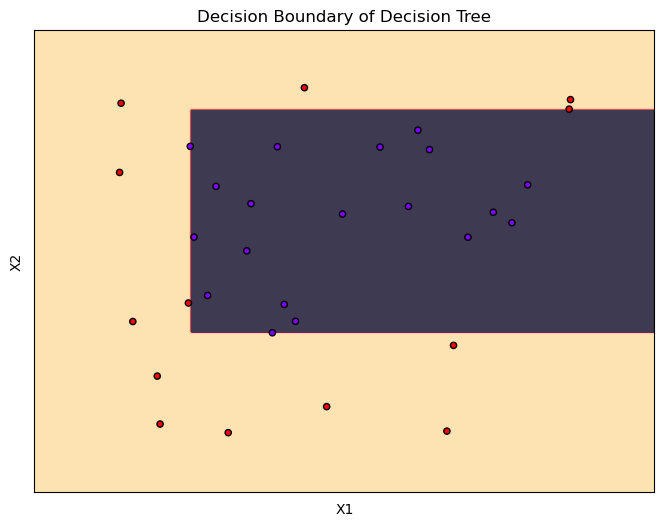

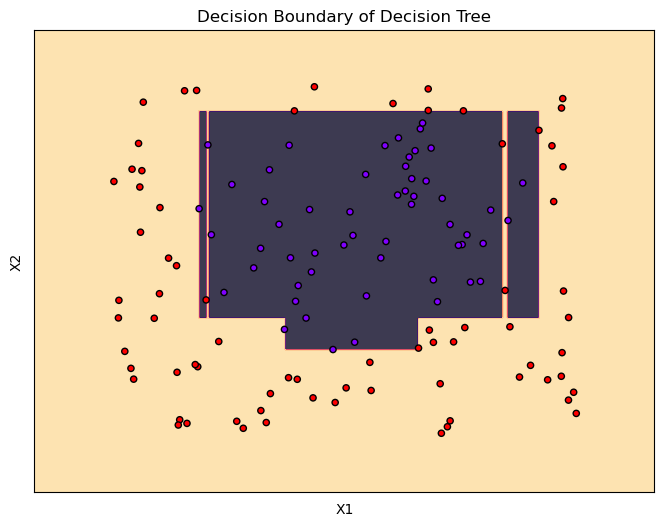

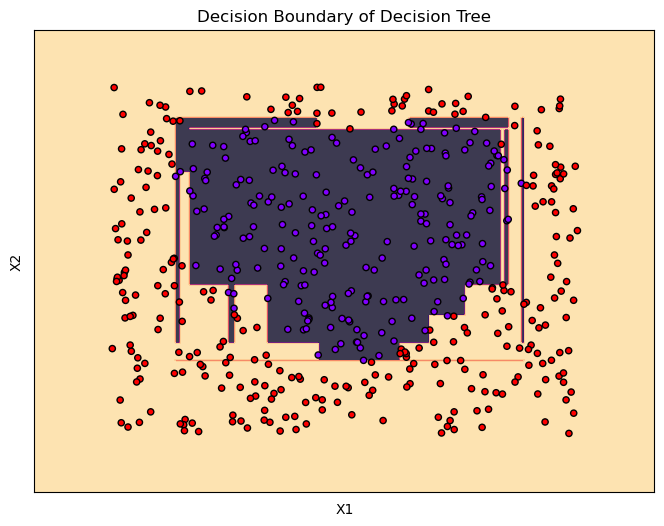

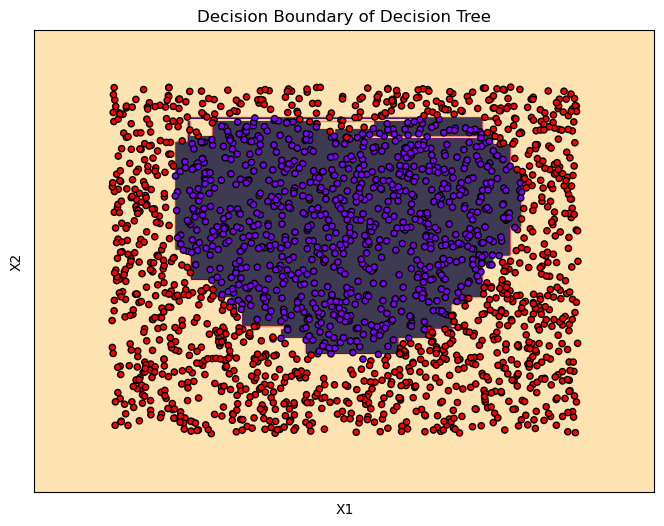

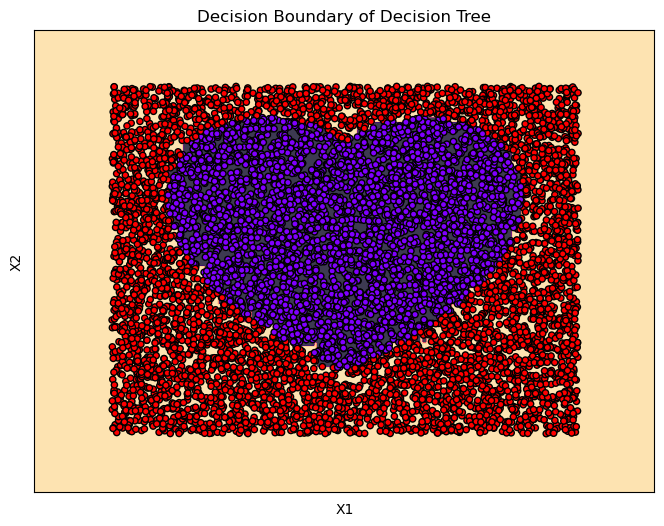

In [4]:
file = "\HW2 data\Dbig.txt"
path = os.getcwd()+file
Dbig = np.loadtxt(path)

# permutation
random.seed(531)
permu = random.sample(range(10000), 10000)

# test set
#print(len(permu[8192:]))
Y_test=Dbig[permu[8192:],2]
X_test=Dbig[permu[8192:],0:2]

# training set
set_size = [32, 128, 512, 2048, 8192]

# Initialize lists to store results
nodes_n = []
err_n = []

for size in set_size:
    Y = Dbig[permu[:size],2]
    X = Dbig[permu[:size],0:2]
    
    clf.fit(X, Y)
    clf.plot_decision_boundary(X,Y)
    Y_pred = clf.predict(X_test)
    err = 1-accuracy(Y_test, Y_pred)
    n_nodes = clf.count_nodes()
    
    err_n.append(err)
    nodes_n.append(n_nodes)

In [5]:
d = { 'n_nodes':nodes_n, 'err_n':err_n, 'set_size':set_size}
nodes_vs_err = pd.DataFrame(d).set_index('set_size')
print(nodes_vs_err)

          n_nodes     err_n
set_size                   
32              7  0.190265
128            23  0.107854
512            55  0.053097
2048          123  0.031527
8192          245  0.013827


Text(0.5, 1.0, 'Learning Curve')

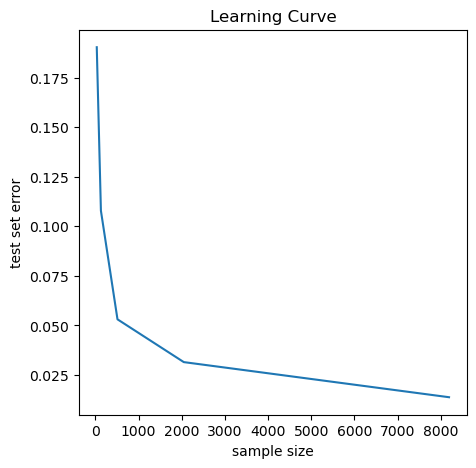

In [6]:
plt.figure(figsize = (5, 5))
plt.plot(set_size, err_n)
plt.xlabel("sample size")
plt.ylabel('test set error')
plt.title("Learning Curve")
